In [51]:
def load_data(num):
    """
    """
    df_columns = pd.read_csv(f'{getcwd()}\Datos\{num}', sep='\t')
    colnames = list(df_test.columns)[0].split(',')

    # Removing hashtags
    colnames = [colname.replace('#', '') for colname in colnames]
    # Removing empty spaces
    colnames = [colname.replace(' ', '') for colname in colnames]

    df_data = pd.read_fwf(f'{getcwd()}\Datos\{num}', header=None, skiprows=[0], names=colnames)

    return df_data

In [54]:
def load_IAC_data(name):
    """
    """
    # 25
    colnames = ['log(L)', 'log(Teff)', 'log(g)', 'mass_ini', 'massin', 's_log(L)', 's_log(Teff)', 's_log(g)', 's_mass_ini', 's_massin', 'age', 'Z', 'mass_2/mass_1', 'Mbol', 'U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', 'L', 'L`', 'M']

    df_data = pd.read_csv(f'{getcwd()}\IAC\{name}', header=None, skiprows=15, names=colnames, sep='\s+')
    # Elimina los ultimos valores
    df_data.drop(df_data.tail(9).index, inplace = True) 

    # Convert type to float
    df_data = df_data.astype(float)

    conditions = [(df_data['age'] <= 100000000),
    (df_data['age'] > 100000000) & (df_data['age'] <= 400000000),
    (df_data['age'] > 400000000) & (df_data['age'] <= 1000000000),
    (df_data['age'] > 1000000000) & (df_data['age'] <= 3000000000),
    (df_data['age'] > 3000000000) & (df_data['age'] <= 6000000000),
    (df_data['age'] > 6000000000) & (df_data['age'] <= 10000000000),
    (df_data['age'] > 10000000000) & (df_data['age'] <= 13000000000)]

    # create a list of the values we want to assign for each condition
    values = ['b', 'y', 'g', 'm', 'c', 'r', 'k']

    # create a new column and use np.select to assign values to it using our lists as arguments
    df_data['star_age'] = np.select(conditions, values)

    return df_data

In [55]:
def plot_data(df_input):
    """
    """

    fig, ax = plt.subplots(figsize=(11.69, 8.27))

    t = df_input['star_age'].tolist()

    ax.scatter(df_input['V']-df_input['I'], df_input['I'], c=t, s=2)

    ax.set_title(name)
    ax.set_xlabel('(V-I)')
    ax.set_ylabel('M_i')

    ax.set_xlim([-1, 3])
    
    # Invert y axis in order to display positive values in lower side
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

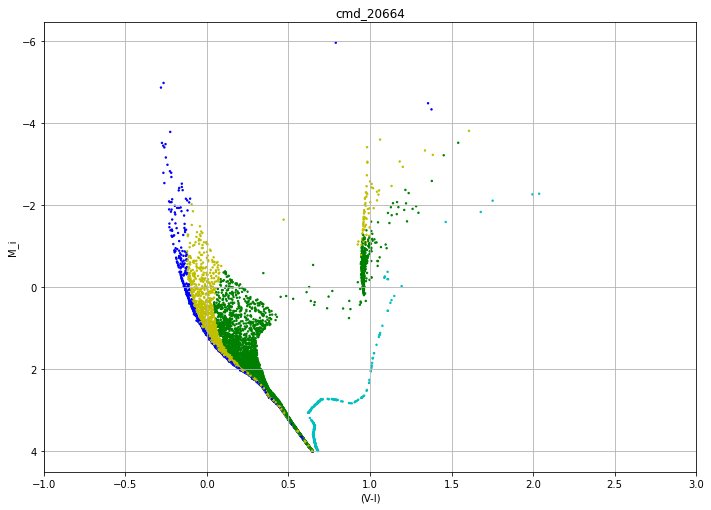

In [60]:
from os import getcwd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

num = 'cmd_Nbajo.txt'
name= 'cmd_20664'

if __name__ == "__main__":
    df = load_IAC_data(name)
    plot_data(df)